In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Pandemic Data

In [9]:
trips = pd.read_csv("data/Trips_by_Distance.csv")
trips

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID
0,National,2019/01/01,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101
1,National,2019/01/02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102
2,National,2019/01/03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103
3,National,2019/01/04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104
4,National,2019/01/05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654209,National,2021/04/06,NaN,NaN,NaN,NaN,66057196.0,262182327.0,1.302320e+09,370719248.0,311166909.0,155281909.0,195570609.0,184605914.0,58055801.0,18062211.0,6683989.0,1333291.0,839677.0,00-00000-20210406
2654210,National,2021/04/07,NaN,NaN,NaN,NaN,69939398.0,258300125.0,1.331920e+09,360589338.0,312961306.0,159973809.0,205926446.0,198917159.0,63352188.0,20009463.0,7674468.0,1575659.0,940511.0,00-00000-20210407
2654211,National,2021/04/08,NaN,NaN,NaN,NaN,68435833.0,259803690.0,1.304731e+09,354578027.0,310009953.0,156692195.0,199694930.0,190909721.0,61276604.0,20198825.0,8601210.0,1771694.0,997851.0,00-00000-20210408
2654212,National,2021/04/09,NaN,NaN,NaN,NaN,66626633.0,261612890.0,1.294675e+09,345595659.0,305164290.0,155979263.0,199490481.0,191450384.0,61627910.0,21656674.0,10555256.0,2096945.0,1058416.0,00-00000-20210409


In [3]:
epicurve_report_date = pd.read_csv("data/epicurve_rpt_date.csv")
epicurve_report_date

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases
0,state_total,Georgia,2020-02-01,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000
1,state_total,Georgia,2020-02-02,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000
2,state_total,Georgia,2020-02-03,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000
3,state_total,Georgia,2020-02-04,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000
4,state_total,Georgia,2020-02-05,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72571,county_stats,Worth,2021-04-19,0,0,1176,59,0.571429,0.000000,0,0,575,7,0,1751,1.285714,0.000000,1.857143
72572,county_stats,Worth,2021-04-20,2,0,1178,59,0.857143,0.000000,3,0,578,7,5,1756,0.857143,0.000000,1.714286
72573,county_stats,Worth,2021-04-21,1,0,1179,59,1.000000,0.000000,1,0,579,7,2,1758,0.571429,0.000000,1.571429
72574,county_stats,Worth,2021-04-22,1,1,1180,60,1.142857,0.142857,3,1,582,8,4,1762,1.000000,0.142857,2.142857


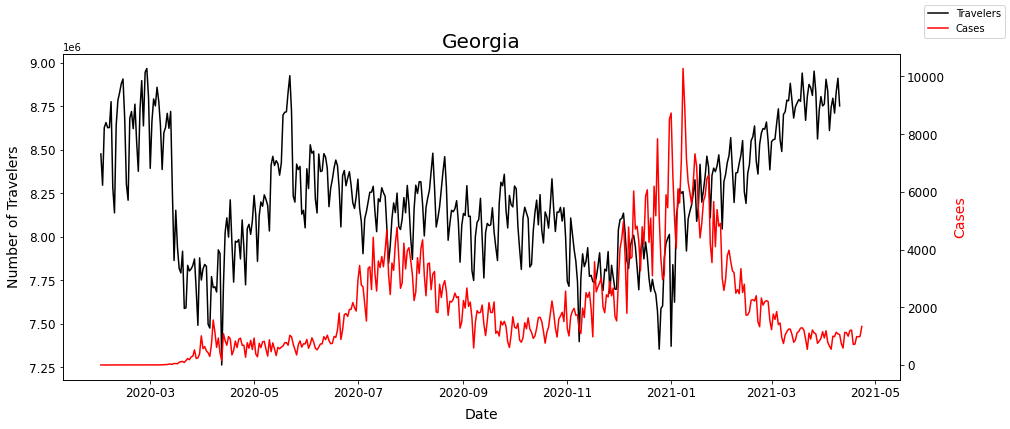

In [15]:
trip_indices = np.array(trips["State Postal Code"] == "GA")
trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-02-01"))
state_travel = trips.loc[trip_indices].reset_index()
trip_indices = np.where(pd.isnull(state_travel["County Name"]))
state_travel = state_travel.loc[trip_indices]

state_travelers = state_travel["Population Not Staying at Home"]
state_trip_dates = pd.to_datetime(state_travel["Date"])

state_cases = epicurve_report_date.loc[epicurve_report_date["county"] == "Georgia"]
state_case_dates = pd.to_datetime(state_cases["report_date"])
state_case_numbers = state_cases["cases"]

fig, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(state_trip_dates,state_travelers,color='k',label="Travelers")
ax1.set_ylabel("Number of Travelers",fontsize=14,labelpad=8)
ax1.set_xlabel("Date",fontsize=14,labelpad=8)

ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = ax1.twinx()

ax2.plot(state_case_dates,state_case_numbers,color='red',label="Cases")
ax2.set_ylabel("Cases",fontsize=14,labelpad=8,color='red')

ax2.tick_params(axis='both', which='major', labelsize=12)

plt.title("Georgia",fontsize=20)
fig.legend(loc=1)

plt.show()

In [78]:
def plot_cases_travelers(county_name, save=False):
    trip_indices = np.logical_and(np.array(trips["County Name"] == (county_name + " County")), np.array(trips["State Postal Code"] == "GA"))
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-02-01"))
    county_travel = trips.loc[trip_indices]
    county_travelers = county_travel["Population Not Staying at Home"]
    county_trip_dates = pd.to_datetime(county_travel["Date"])
    
    county_cases = epicurve_report_date.loc[epicurve_report_date["county"] == county_name]
    county_case_dates = pd.to_datetime(county_cases["report_date"])
    county_case_numbers = county_cases["cases"]
    
    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.plot(county_trip_dates,county_travelers,color='k',label="Travelers")
    ax1.set_ylabel("Number of Travelers",fontsize=14,labelpad=8)
    ax1.set_xlabel("Date",fontsize=14,labelpad=8)
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    ax2 = ax1.twinx()

    ax2.plot(county_case_dates,county_case_numbers,color='red',label="Cases")
    ax2.set_ylabel("Cases",fontsize=14,labelpad=8,color='red')
    
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    plt.title("{} County".format(county_name),fontsize=20)
    fig.legend(loc=1)

    if save:
        plt.savefig("{}_cases_travelers.png".format(county_name))
    plt.show()

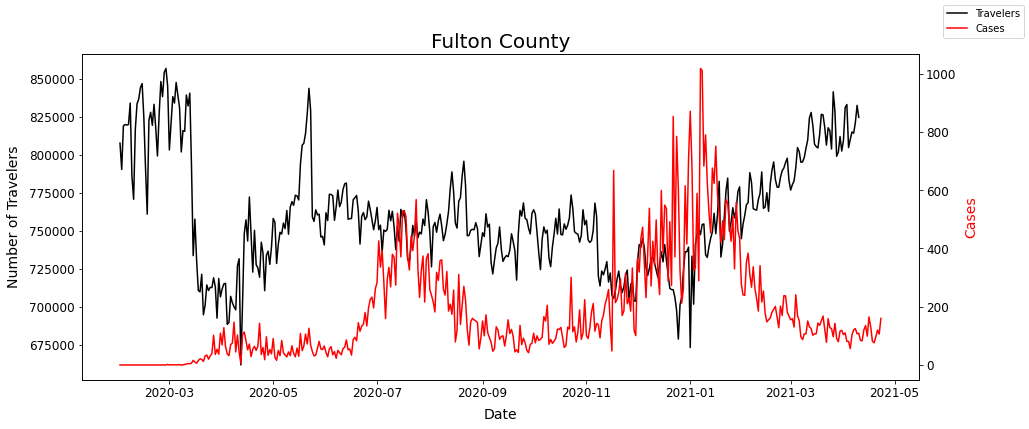

In [79]:
plot_cases_travelers("Fulton")

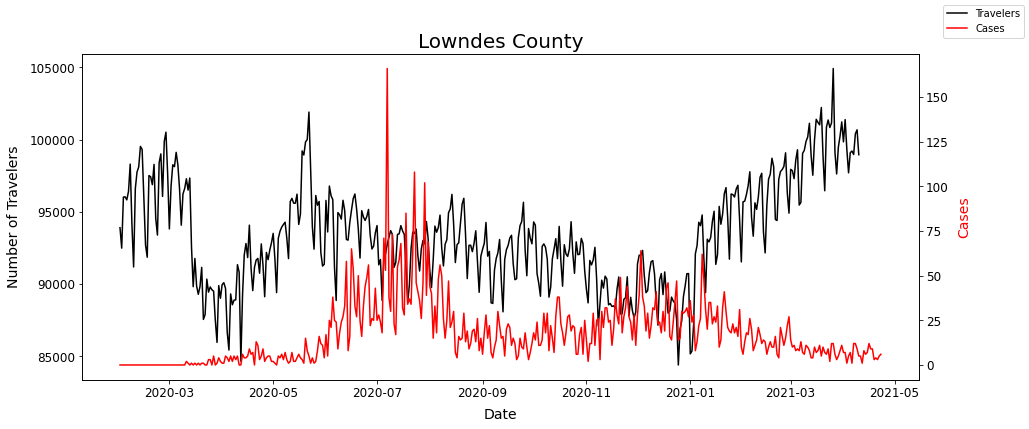

In [80]:
plot_cases_travelers("Lowndes")

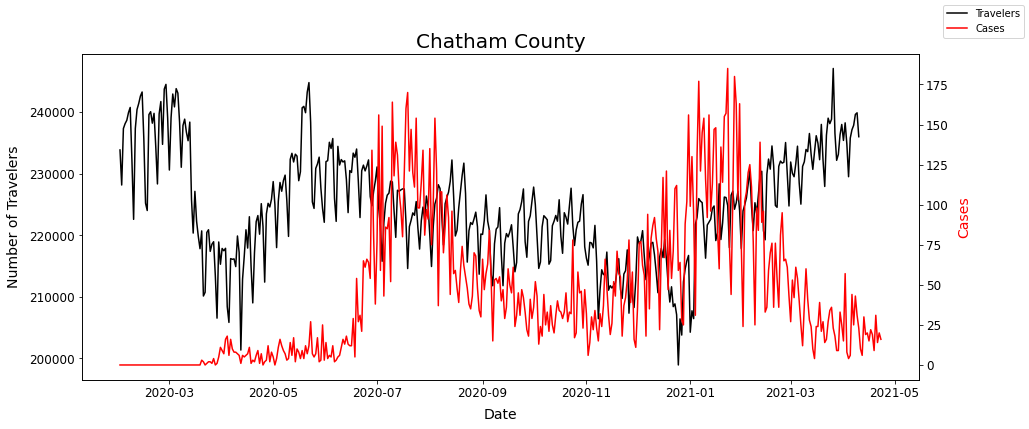

In [81]:
plot_cases_travelers("Chatham")

# Vaccine Data

In [14]:
pfizer = pd.read_csv("data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv")
pfizer

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/26/2021,54990,54990
1,Maine,04/26/2021,21060,21060
2,Massachusetts,04/26/2021,105300,105300
3,New Hampshire,04/26/2021,21060,21060
4,Rhode Island,04/26/2021,16380,16380
...,...,...,...,...
1255,Virginia,12/14/2020,72150,72150
1256,Washington,12/14/2020,62400,62400
1257,West Virginia,12/14/2020,16575,16575
1258,Wisconsin,12/14/2020,49725,49725


In [50]:
moderna = pd.read_csv("data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv")
moderna

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/26/2021,40400,40400
1,Maine,04/26/2021,15400,15400
2,Massachusetts,04/26/2021,77700,77700
3,New Hampshire,04/26/2021,15500,15500
4,Rhode Island,04/26/2021,12100,12100
...,...,...,...,...
1192,Virginia,12/21/2020,146400,146400
1193,Washington,12/21/2020,128000,128000
1194,West Virginia,12/21/2020,32600,32600
1195,Wisconsin,12/21/2020,101000,101000


In [51]:
janssen = pd.read_csv("data/COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv")
janssen

,Jurisdiction,Week of Allocations,1st Dose Allocations
0,Connecticut,04/12/2021,6400
1,Maine,04/12/2021,2500
2,Massachusetts,04/12/2021,12300
3,New Hampshire,04/12/2021,2500
4,Rhode Island,04/12/2021,2000
...,...,...,...
373,Alaska,03/01/2021,8900
374,Idaho,03/01/2021,13300
375,Oregon,03/01/2021,34400
376,Washington,03/01/2021,60900


In [128]:
thing = pd.DataFrame()
thing.append({"Thing":"IDK"},ignore_index=True)

,Thing
0,IDK


In [159]:
all_dates[0] in list(state_pfizer["Week of Allocations"])

False

In [180]:
trip_indices = np.array(trips["State Postal Code"] == "GA")
trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-12-01"))
trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) <= "2021-04-26"))
state_travel = trips.loc[trip_indices].reset_index()
trip_indices = np.where(pd.isnull(state_travel["County Name"]))
state_travel = state_travel.loc[trip_indices]
state_trip_dates = pd.to_datetime(state_travel["Date"])
state_travelers = state_travel["Population Not Staying at Home"]

state_pfizer = pfizer.loc[pfizer["Jurisdiction"] == "Georgia"].reset_index(drop=True)
state_moderna = moderna.loc[moderna["Jurisdiction"] == "Georgia"].reset_index(drop=True)
state_janssen = janssen.loc[janssen["Jurisdiction"] == "Georgia"].reset_index(drop=True)

all_dates = list(pd.to_datetime(state_travel["Date"]))
all_dates_str = []
for i in range(len(all_dates)):
    all_dates_str.append(all_dates[i].strftime("%m/%d/%Y"))
state_first_dose = pd.DataFrame()
for i in range(len(all_dates)):
    num_allocations = 0
    if all_dates_str[i] in list(state_pfizer["Week of Allocations"]):
        num_allocations += int(state_pfizer[state_pfizer["Week of Allocations"] == all_dates_str[i]]["1st Dose Allocations"])
    if all_dates_str[i] in list(state_moderna["Week of Allocations"]):
        num_allocations += int(state_moderna[state_moderna["Week of Allocations"] == all_dates_str[i]]["1st Dose Allocations"])
    if all_dates_str[i] in list(state_janssen["Week of Allocations"]):
        num_allocations += int(state_janssen[state_janssen["Week of Allocations"] == all_dates_str[i]]["1st Dose Allocations"])
    state_first_dose = state_first_dose.append({"Week of Allocations":all_dates_str[i],
                                                "1st Dose Allocations":num_allocations},ignore_index=True)

state_first_dose

,1st Dose Allocations,Week of Allocations
0,0.0,12/01/2020
1,0.0,12/02/2020
2,0.0,12/03/2020
3,0.0,12/04/2020
4,0.0,12/05/2020
...,...,...
126,0.0,04/06/2021
127,0.0,04/07/2021
128,0.0,04/08/2021
129,0.0,04/09/2021


In [151]:
def plot_firstdose_travelers(state_name, state_code, save=False):
    trip_indices = np.array(trips["State Postal Code"] == state_code)
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-12-01"))
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) <= "2021-04-26"))
    state_travel = trips.loc[trip_indices].reset_index()
    trip_indices = np.where(pd.isnull(state_travel["County Name"]))
    state_travel = state_travel.loc[trip_indices]
    state_trip_dates = pd.to_datetime(state_travel["Date"])
    state_travelers = state_travel["Population Not Staying at Home"]
    
    state_pfizer = pfizer.loc[pfizer["Jurisdiction"] == state_name].reset_index(drop=True).iloc[::-1].reset_index(drop=True)
    state_moderna = moderna.loc[moderna["Jurisdiction"] == state_name].reset_index(drop=True)
    state_janssen = janssen.loc[janssen["Jurisdiction"] == state_name].reset_index(drop=True)

    pfizer_dates = state_pfizer["Week of Allocations"]
    state_first_dose = pd.DataFrame()
    for i in range(len(pfizer_dates)):
        num_allocations = int(state_pfizer[state_pfizer["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
        if pfizer_dates[i] in list(state_moderna["Week of Allocations"]):
            num_allocations += int(state_moderna[state_moderna["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
        if pfizer_dates[i] in list(state_janssen["Week of Allocations"]):
            num_allocations += int(state_janssen[state_janssen["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
        state_first_dose = state_first_dose.append({"Week of Allocations":pfizer_dates[i],
                                                    "1st Dose Allocations":num_allocations},ignore_index=True)
    state_alloc_dates = pd.to_datetime(state_first_dose["Week of Allocations"])
    state_dose_nums = state_first_dose["1st Dose Allocations"]

    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.plot(state_trip_dates,state_travelers,color='k',label="Travelers")
    ax1.set_ylabel("Number of Travelers",fontsize=14,labelpad=8)
    ax1.set_xlabel("Date",fontsize=14,labelpad=8)
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    ax2 = ax1.twinx()

    ax2.plot(state_alloc_dates,state_dose_nums,color='red',label="1st Dose Allocations")
    ax2.set_ylabel("Vaccine Allocations",fontsize=14,labelpad=8,color='red')
    
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    plt.title("{}".format(state_name),fontsize=20)
    fig.legend(loc=1)

    if save:
        plt.savefig("{}_first_vaccine_travelers.png".format(state_name))
    plt.show()

In [147]:
def plot_seconddose_travelers(state_name, state_code, save=False):
    trip_indices = np.array(trips["State Postal Code"] == state_code)
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-12-01"))
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) <= "2021-04-26"))
    state_travel = trips.loc[trip_indices].reset_index()
    trip_indices = np.where(pd.isnull(state_travel["County Name"]))
    state_travel = state_travel.loc[trip_indices]
    state_trip_dates = pd.to_datetime(state_travel["Date"])
    state_travelers = state_travel["Population Not Staying at Home"]
    
    state_pfizer = pfizer.loc[pfizer["Jurisdiction"] == state_name].reset_index(drop=True).iloc[::-1].reset_index(drop=True)
    state_moderna = moderna.loc[moderna["Jurisdiction"] == state_name].reset_index(drop=True)

    pfizer_dates = state_pfizer["Week of Allocations"]
    state_second_dose = pd.DataFrame()
    for i in range(len(pfizer_dates)):
        num_allocations = int(state_pfizer[state_pfizer["Week of Allocations"] == pfizer_dates[i]]["2nd Dose Allocations"])
        if pfizer_dates[i] in list(state_moderna["Week of Allocations"]):
            num_allocations += int(state_moderna[state_moderna["Week of Allocations"] == pfizer_dates[i]]["2nd Dose Allocations"])
        state_second_dose = state_second_dose.append({"Week of Allocations":pfizer_dates[i],
                                                    "2nd Dose Allocations":num_allocations},ignore_index=True)
    state_alloc_dates = pd.to_datetime(state_second_dose["Week of Allocations"])
    state_dose_nums = state_second_dose["2nd Dose Allocations"]

    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.plot(state_trip_dates,state_travelers,color='k',label="Travelers")
    ax1.set_ylabel("Number of Travelers",fontsize=14,labelpad=8)
    ax1.set_xlabel("Date",fontsize=14,labelpad=8)
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    ax2 = ax1.twinx()

    ax2.plot(state_alloc_dates,state_dose_nums,color='red',label="2nd Dose Allocations")
    ax2.set_ylabel("Vaccine Allocations",fontsize=14,labelpad=8,color='red')
    
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    plt.title("{}".format(state_name),fontsize=20)
    fig.legend(loc=1)

    if save:
        plt.savefig("{}_second_vaccine_travelers.png".format(state_name))
    plt.show()

In [149]:
def plot_cumsum_vax_travelers(state_name, state_code, save=False):
    trip_indices = np.array(trips["State Postal Code"] == state_code)
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) >= "2020-12-01"))
    trip_indices = np.logical_and(trip_indices, np.array(pd.to_datetime(trips["Date"]) <= "2021-04-26"))
    state_travel = trips.loc[trip_indices].reset_index()
    trip_indices = np.where(pd.isnull(state_travel["County Name"]))
    state_travel = state_travel.loc[trip_indices]
    state_trip_dates = pd.to_datetime(state_travel["Date"])
    state_travelers = state_travel["Population Not Staying at Home"]
    
    state_pfizer = pfizer.loc[pfizer["Jurisdiction"] == state_name].reset_index(drop=True).iloc[::-1].reset_index(drop=True)
    state_moderna = moderna.loc[moderna["Jurisdiction"] == state_name].reset_index(drop=True)
    state_janssen = janssen.loc[janssen["Jurisdiction"] == state_name].reset_index(drop=True)

    pfizer_dates = state_pfizer["Week of Allocations"]
    state_first_dose = pd.DataFrame()
    for i in range(len(pfizer_dates)):
        num_allocations = int(state_pfizer[state_pfizer["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
        num_allocations += int(state_pfizer[state_pfizer["Week of Allocations"] == pfizer_dates[i]]["2nd Dose Allocations"])
        if pfizer_dates[i] in list(state_moderna["Week of Allocations"]):
            num_allocations += int(state_moderna[state_moderna["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
            num_allocations += int(state_moderna[state_moderna["Week of Allocations"] == pfizer_dates[i]]["2nd Dose Allocations"])
        if pfizer_dates[i] in list(state_janssen["Week of Allocations"]):
            num_allocations += int(state_janssen[state_janssen["Week of Allocations"] == pfizer_dates[i]]["1st Dose Allocations"])
        state_first_dose = state_first_dose.append({"Week of Allocations":pfizer_dates[i],
                                                    "Allocations":num_allocations},ignore_index=True)
    state_alloc_dates = pd.to_datetime(state_first_dose["Week of Allocations"])
    state_dose_nums = state_first_dose["Allocations"]
    state_dose_nums_cum = state_dose_nums.cumsum()

    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.plot(state_trip_dates,state_travelers,color='k',label="Travelers")
    ax1.set_ylabel("Number of Travelers",fontsize=14,labelpad=8)
    ax1.set_xlabel("Date",fontsize=14,labelpad=8)
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    ax2 = ax1.twinx()

    ax2.plot(state_alloc_dates,state_dose_nums_cum,color='red',label="Cumulative Dose Allocations")
    ax2.set_ylabel("Cumulative Vaccine Allocations",fontsize=14,labelpad=8,color='red')
    
    ax2.tick_params(axis='both', which='major', labelsize=12)
    
    plt.title("{}".format(state_name),fontsize=20)
    fig.legend(loc=1)

    if save:
        plt.savefig("{}_cumsum_vax_travelers.png".format(state_name))
    plt.show()

20 131


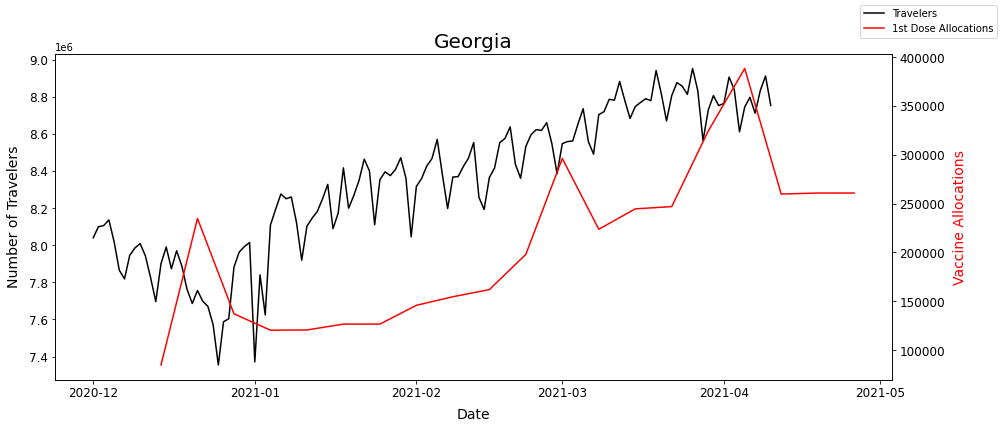

In [152]:
plot_firstdose_travelers("Georgia","GA")

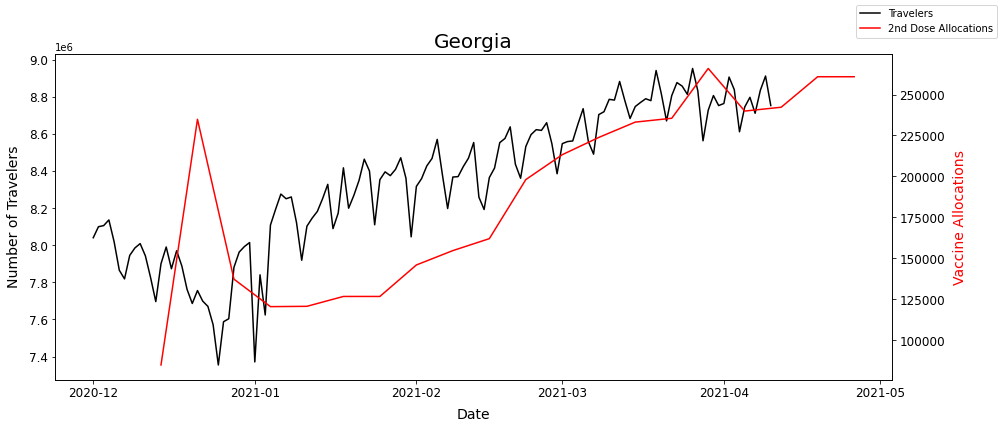

In [148]:
plot_seconddose_travelers("Georgia","GA")

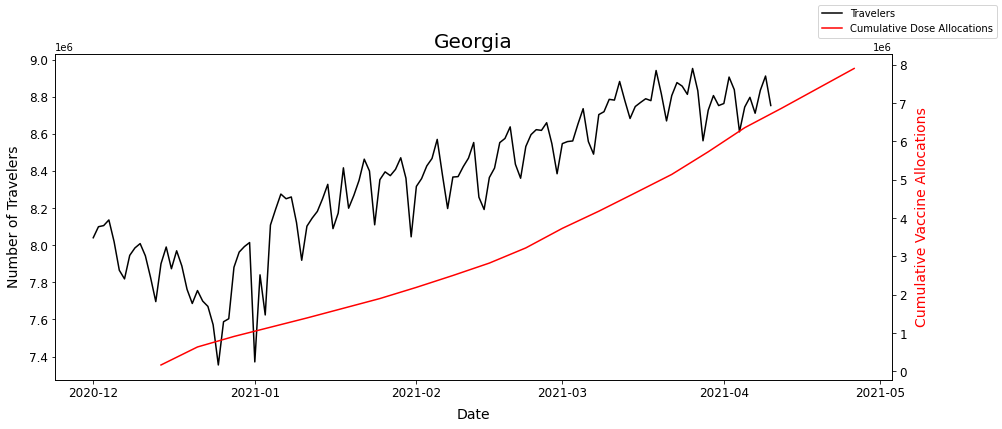

In [150]:
plot_cumsum_vax_travelers("Georgia","GA")